In [1]:
#for data wrangling and manipulation

import pandas as pd
import numpy as np

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# For word lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# for word Stemming
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global Parameters
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# from autosklearn.regression import AutoSklearnRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
a=pd.read_excel("a.xlsx")
b=pd.read_excel("b.xlsx")
c=pd.read_excel("c.xlsx")
d=pd.read_excel("d.xlsx")
e=pd.read_excel("e.xlsx")
f=pd.read_excel("f.xlsx")
g=pd.read_excel("g.xlsx")
h=pd.read_excel("a.xlsx")
i=pd.read_excel("i.xlsx")
j=pd.read_excel("j.xlsx")
k=pd.read_excel("k.xlsx")
l=pd.read_excel("l.xlsx")
m=pd.read_excel("m.xlsx")

In [3]:
frames = [a,b,c,d,e,f,g,h,i,j,k,l,m]

d=pd.concat(frames)

In [4]:
a=[1,3,4,5,6,7,8,17,20]
df=d.iloc[:,a]
df

country        date  isVerified  position productAsin  ratingScore  \
0      India  2023-04-11        True         1  B09F6S8BT6            4   
1      India  2023-04-20        True         2  B09F6S8BT6            4   
2      India  2023-04-20        True         3  B09F6S8BT6            4   
3      India  2023-04-11        True         4  B09F6S8BT6            4   
4      India  2023-04-05        True         5  B09F6S8BT6            4   
...      ...         ...         ...       ...         ...          ...   
1874   India  2020-08-15        True       646  B0B6PF75H5            5   
1875   India  2021-01-27        True       647  B0B6PF75H5            5   
1876   India  2021-04-08        True       648  B0B6PF75H5            5   
1877   India  2020-09-11        True       649  B0B6PF75H5            4   
1878   India  2020-06-21        True       650  B0B6PF75H5            1   

                                      reviewDescription  \
0     TV is good sound quality and picture quality a...   
1                                                  Good   
2                       V good tv and fast installation   
3     So much features in such a less price.. nice t...   
4     I love that, picture quality is awesome and so...   
...                                                 ...   
1874  I have purchased this Onida fire tv 32 and thi...   
1875  Got this tv in the sale for 14k.Good picture q...   
1876  this tv is always better than android tvs pict...   
1877                                          Very good   
1878  Within one month, started having issues, scree...   

                                            reviewTitle  \
0                   Wonderful good pic & sound quality.   
1                           How can I connect Bluetooth   
2                                                  Good   
3                                                Nice..   
4                                       Value for money   
...                                                 ...   
1874                                    Awesome product   
1875                            Great TV in its segment   
1876                    its just osm product from onida   
1877                                               Good   
1878  Very disappointed... useless..... pathetic... ...   

                                        username  
0                                Amazon Customer  
1                             DIPANJAN MAHAPATRA  
2                                     anil bajaj  
3                           Soheb khanSoheb khan  
4                                     AMIT MEHRA  
...                                          ...  
1874                      PlaceholderPlaceholder  
1875                                 Punit Singh  
1876  Eknath sanjay shingneEknath sanjay shingne  
1877                                      ashwin  
1878                                 Akash Uppal  

[24321 rows x 9 columns]

In [5]:
#df.to_excel("ecomdata.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24321 entries, 0 to 1878
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            24321 non-null  object
 1   date               24321 non-null  object
 2   isVerified         24321 non-null  bool  
 3   position           24321 non-null  int64 
 4   productAsin        24321 non-null  object
 5   ratingScore        24321 non-null  int64 
 6   reviewDescription  22980 non-null  object
 7   reviewTitle        24269 non-null  object
 8   username           24320 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 1.7+ MB


In [6]:
df['productAsin'].unique()

array(['B09F6S8BT6', 'B08B42LWKN', 'B07MNNH484', 'B0B1YVCJ2Y',
       'B09WN3SRC7', 'B09F9YQQ7B', 'B08DPLCM6T', 'B0BV2VFY5D',
       'B08FD2VSD9', 'B0B21XL94T', 'B0B45VT3WK', 'B0B6PF75H5'],
      dtype=object)

In [7]:
df.describe()

position   ratingScore
count  24321.000000  24321.000000
mean    1765.594096      4.040171
std     1344.679464      1.400948
min        1.000000      1.000000
25%      646.000000      4.000000
50%     1409.000000      5.000000
75%     2686.000000      5.000000
max     5000.000000      5.000000

In [8]:
df.isnull().any()

country              False
date                 False
isVerified           False
position             False
productAsin          False
ratingScore          False
reviewDescription     True
reviewTitle           True
username              True
dtype: bool

In [9]:
df.dropna(inplace = True)
df.head()

country        date  isVerified  position productAsin  ratingScore  \
0   India  2023-04-11        True         1  B09F6S8BT6            4   
1   India  2023-04-20        True         2  B09F6S8BT6            4   
2   India  2023-04-20        True         3  B09F6S8BT6            4   
3   India  2023-04-11        True         4  B09F6S8BT6            4   
4   India  2023-04-05        True         5  B09F6S8BT6            4   

                                   reviewDescription  \
0  TV is good sound quality and picture quality a...   
1                                               Good   
2                    V good tv and fast installation   
3  So much features in such a less price.. nice t...   
4  I love that, picture quality is awesome and so...   

                           reviewTitle              username  
0  Wonderful good pic & sound quality.       Amazon Customer  
1          How can I connect Bluetooth    DIPANJAN MAHAPATRA  
2                                 Good            anil bajaj  
3                               Nice..  Soheb khanSoheb khan  
4                      Value for money            AMIT MEHRA

In [10]:
df.count()

country              22939
date                 22939
isVerified           22939
position             22939
productAsin          22939
ratingScore          22939
reviewDescription    22939
reviewTitle          22939
username             22939
dtype: int64

In [11]:
# Column to check for duplicates
column_to_check = 'reviewDescription'

In [14]:
# Check for duplicates in the specified column
duplicates = df[df.duplicated(subset=column_to_check, keep=False)]

if duplicates.empty:
    print("No duplicate values found in the column:", column_to_check)
else:
    print("Duplicate values found in the column:", column_to_check)
    print(duplicates)

Duplicate values found in the column: reviewDescription
     country        date  isVerified  position productAsin  ratingScore  \
0      India  2023-04-11        True         1  B09F6S8BT6            4   
1      India  2023-04-20        True         2  B09F6S8BT6            4   
2      India  2023-04-20        True         3  B09F6S8BT6            4   
3      India  2023-04-11        True         4  B09F6S8BT6            4   
4      India  2023-04-05        True         5  B09F6S8BT6            4   
...      ...         ...         ...       ...         ...          ...   
1849   India  2020-11-28        True      1261  B0B6PF75H5            5   
1853   India  2021-01-01        True      1265  B0B6PF75H5            5   
1855   India  2020-11-04        True      1267  B0B6PF75H5            5   
1865   India  2021-01-24        True       787  B0B6PF75H5            3   
1877   India  2020-09-11        True       649  B0B6PF75H5            4   

                                      revie

In [11]:
df

country        date  isVerified  position productAsin  ratingScore  \
0      India  2023-04-11        True         1  B09F6S8BT6            4   
1      India  2023-04-20        True         2  B09F6S8BT6            4   
2      India  2023-04-20        True         3  B09F6S8BT6            4   
3      India  2023-04-11        True         4  B09F6S8BT6            4   
4      India  2023-04-05        True         5  B09F6S8BT6            4   
...      ...         ...         ...       ...         ...          ...   
1874   India  2020-08-15        True       646  B0B6PF75H5            5   
1875   India  2021-01-27        True       647  B0B6PF75H5            5   
1876   India  2021-04-08        True       648  B0B6PF75H5            5   
1877   India  2020-09-11        True       649  B0B6PF75H5            4   
1878   India  2020-06-21        True       650  B0B6PF75H5            1   

                                      reviewDescription  \
0     TV is good sound quality and picture quality a...   
1                                                  Good   
2                       V good tv and fast installation   
3     So much features in such a less price.. nice t...   
4     I love that, picture quality is awesome and so...   
...                                                 ...   
1874  I have purchased this Onida fire tv 32 and thi...   
1875  Got this tv in the sale for 14k.Good picture q...   
1876  this tv is always better than android tvs pict...   
1877                                          Very good   
1878  Within one month, started having issues, scree...   

                                            reviewTitle  \
0                   Wonderful good pic & sound quality.   
1                           How can I connect Bluetooth   
2                                                  Good   
3                                                Nice..   
4                                       Value for money   
...                                                 ...   
1874                                    Awesome product   
1875                            Great TV in its segment   
1876                    its just osm product from onida   
1877                                               Good   
1878  Very disappointed... useless..... pathetic... ...   

                                        username  
0                                Amazon Customer  
1                             DIPANJAN MAHAPATRA  
2                                     anil bajaj  
3                           Soheb khanSoheb khan  
4                                     AMIT MEHRA  
...                                          ...  
1874                      PlaceholderPlaceholder  
1875                                 Punit Singh  
1876  Eknath sanjay shingneEknath sanjay shingne  
1877                                      ashwin  
1878                                 Akash Uppal  

[22939 rows x 9 columns]

## Sentiment Analysis on Number Based Reviews

### Set Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [12]:
def sentiments(ratingScore):
    if (ratingScore == 5) or (ratingScore == 4):
        return "Positive"
    elif ratingScore == 3:
        return "Neutral"
    elif (ratingScore == 2) or (ratingScore == 1) or (ratingScore == 0):
        return "Negative"
# Add sentiments to the data
df["NSentiment"] = df["ratingScore"].apply(sentiments)
df["NSentiment"] = df["ratingScore"].apply(sentiments)
df["NSentiment"]

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1874    Positive
1875    Positive
1876    Positive
1877    Positive
1878    Negative
Name: NSentiment, Length: 22939, dtype: object

In [13]:
df

country        date  isVerified  position productAsin  ratingScore  \
0      India  2023-04-11        True         1  B09F6S8BT6            4   
1      India  2023-04-20        True         2  B09F6S8BT6            4   
2      India  2023-04-20        True         3  B09F6S8BT6            4   
3      India  2023-04-11        True         4  B09F6S8BT6            4   
4      India  2023-04-05        True         5  B09F6S8BT6            4   
...      ...         ...         ...       ...         ...          ...   
1874   India  2020-08-15        True       646  B0B6PF75H5            5   
1875   India  2021-01-27        True       647  B0B6PF75H5            5   
1876   India  2021-04-08        True       648  B0B6PF75H5            5   
1877   India  2020-09-11        True       649  B0B6PF75H5            4   
1878   India  2020-06-21        True       650  B0B6PF75H5            1   

                                      reviewDescription  \
0     TV is good sound quality and picture quality a...   
1                                                  Good   
2                       V good tv and fast installation   
3     So much features in such a less price.. nice t...   
4     I love that, picture quality is awesome and so...   
...                                                 ...   
1874  I have purchased this Onida fire tv 32 and thi...   
1875  Got this tv in the sale for 14k.Good picture q...   
1876  this tv is always better than android tvs pict...   
1877                                          Very good   
1878  Within one month, started having issues, scree...   

                                            reviewTitle  \
0                   Wonderful good pic & sound quality.   
1                           How can I connect Bluetooth   
2                                                  Good   
3                                                Nice..   
4                                       Value for money   
...                                                 ...   
1874                                    Awesome product   
1875                            Great TV in its segment   
1876                    its just osm product from onida   
1877                                               Good   
1878  Very disappointed... useless..... pathetic... ...   

                                        username NSentiment  
0                                Amazon Customer   Positive  
1                             DIPANJAN MAHAPATRA   Positive  
2                                     anil bajaj   Positive  
3                           Soheb khanSoheb khan   Positive  
4                                     AMIT MEHRA   Positive  
...                                          ...        ...  
1874                      PlaceholderPlaceholder   Positive  
1875                                 Punit Singh   Positive  
1876  Eknath sanjay shingneEknath sanjay shingne   Positive  
1877                                      ashwin   Positive  
1878                                 Akash Uppal   Negative  

[22939 rows x 10 columns]

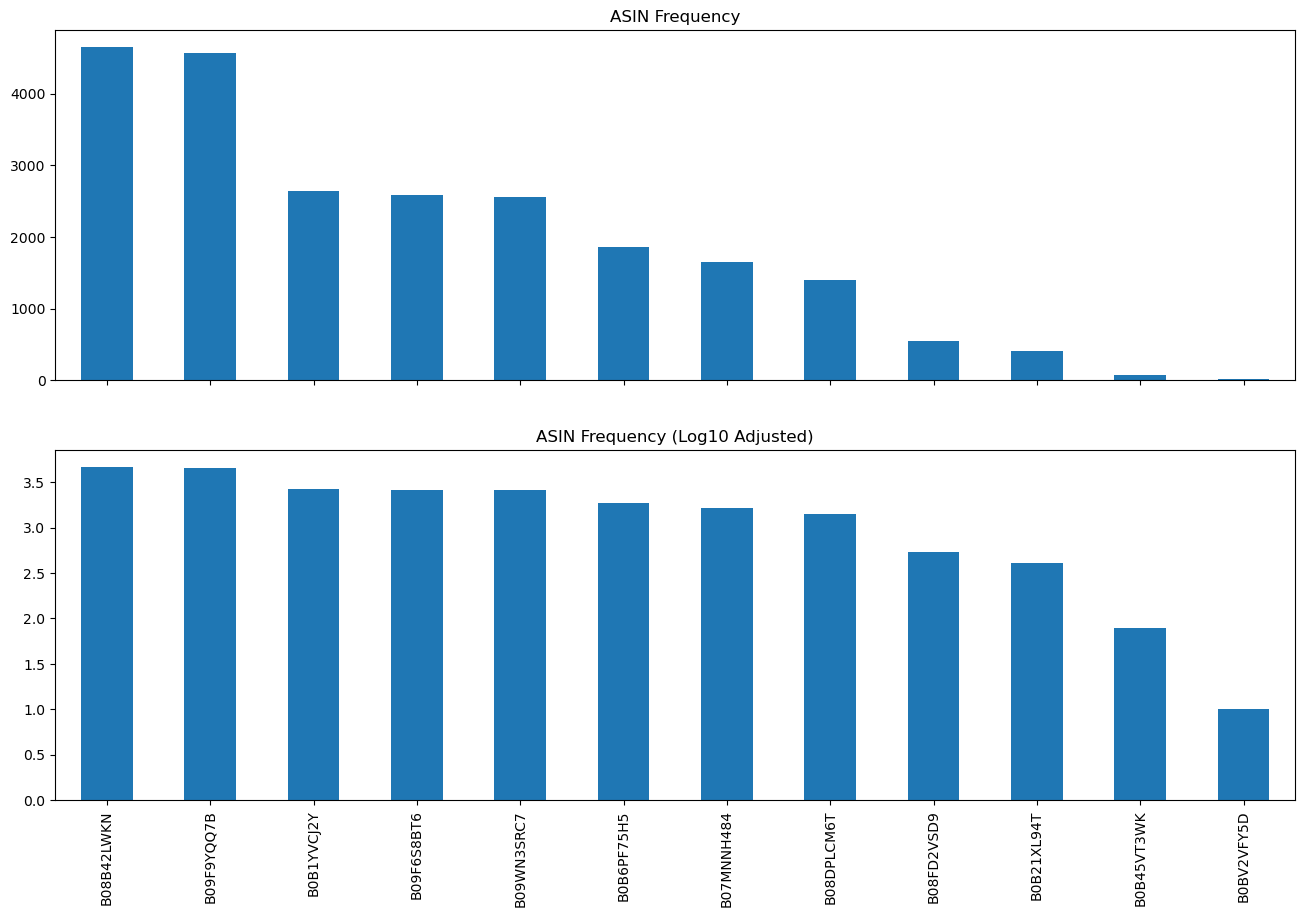

In [14]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
df["productAsin"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(df["productAsin"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
plt.show()

In [16]:
import seaborn as sns

4.012162692357993


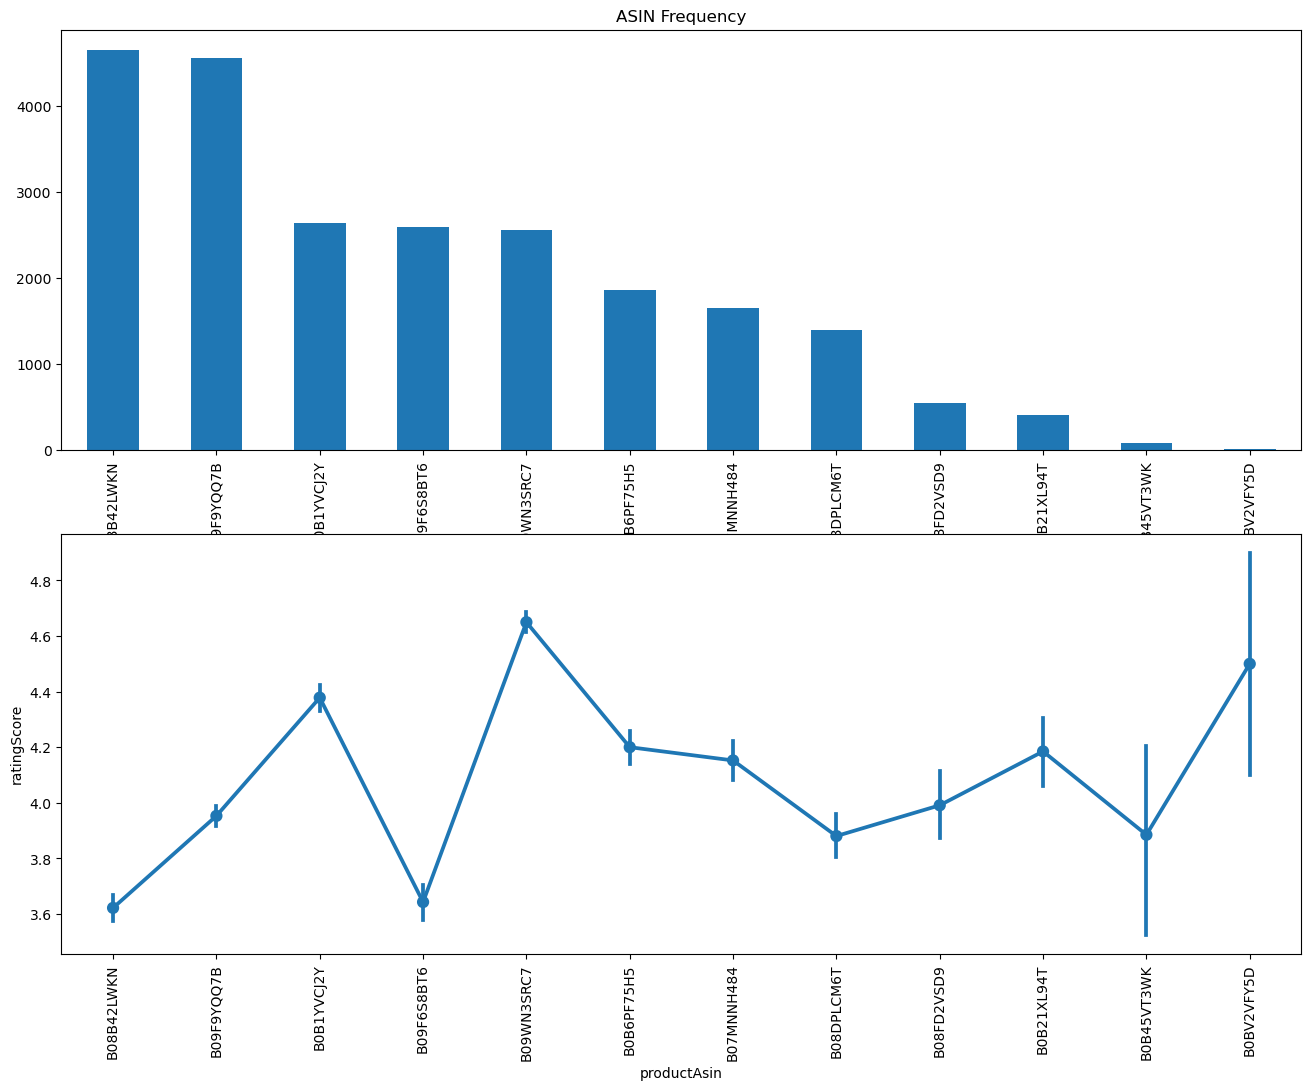

In [18]:
print(df["ratingScore"].mean())

asins_count_ix = df["productAsin"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
df["productAsin"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="productAsin", y="ratingScore", order=asins_count_ix, data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
# categorical variable analysis ---> overall

constraints = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(), 
                          x = [str(i) for i in df[column_name].value_counts().index], 
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = constraints,
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)
    
    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=constraints)),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    
    iplot(fig)

In [20]:
categorical_variable_summary(df,"ratingScore")

In [21]:
categorical_variable_summary(df,"NSentiment")

# Review Cleaning

## 1. Remove HTML tags

In [22]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df.reviewDescription = df.reviewDescription.apply(clean)
df.reviewDescription[0]

0    TV is good sound quality and picture quality a...
0    The package was delivered at door step along w...
0    I acquired this for less than Rs 8,000, and af...
0    About the TV - Wonderful----------------------...
0    Loved the TV, delivery was smooth and installa...
0    I am writing this after using for it for more ...
0            Very good Products thank you for amazon .
0    TV is good sound quality and picture quality a...
0    I give 5 out of 4 and all good but only dissat...
0                                                  Gud
0            After six months use never seen any issue
0    Picture quality super coocaa tv , 1 year back ...
0    Overall class quality as per the price....happ...
Name: reviewDescription, dtype: object

## 2. Remove special characters

In [23]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df.reviewDescription = df.reviewDescription.apply(is_special)
df.reviewDescription[0]

0    TV is good sound quality and picture quality a...
0    The package was delivered at door step along w...
0    I acquired this for less than Rs 8 000  and af...
0    About the TV   Wonderful                      ...
0    Loved the TV  delivery was smooth and installa...
0    I am writing this after using for it for more ...
0            Very good Products thank you for amazon  
0    TV is good sound quality and picture quality a...
0    I give 5 out of 4 and all good but only dissat...
0                                                  Gud
0            After six months use never seen any issue
0    Picture quality super coocaa tv   1 year back ...
0    Overall class quality as per the price    happ...
Name: reviewDescription, dtype: object

## 3. Convert everything to lowercase

In [24]:
def to_lower(text):
    return text.lower()

df.reviewDescription = df.reviewDescription.apply(to_lower)
df.reviewDescription[0]

0    tv is good sound quality and picture quality a...
0    the package was delivered at door step along w...
0    i acquired this for less than rs 8 000  and af...
0    about the tv   wonderful                      ...
0    loved the tv  delivery was smooth and installa...
0    i am writing this after using for it for more ...
0            very good products thank you for amazon  
0    tv is good sound quality and picture quality a...
0    i give 5 out of 4 and all good but only dissat...
0                                                  gud
0            after six months use never seen any issue
0    picture quality super coocaa tv   1 year back ...
0    overall class quality as per the price    happ...
Name: reviewDescription, dtype: object

## 4. Remove stopwords

In [25]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.reviewDescription = df.reviewDescription.apply(rem_stopwords)
df.reviewDescription[0]

0    [tv, good, sound, quality, picture, quality, a...
0    [package, delivered, door, step, along, instal...
0    [acquired, less, rs, 8, 000, two, months, use,...
0    [tv, wonderful, probably, best, tv, price, ran...
0    [loved, tv, delivery, smooth, installation, do...
0    [writing, using, month, got, around, 26k, quit...
0                      [good, products, thank, amazon]
0    [tv, good, sound, quality, picture, quality, a...
0    [give, 5, 4, good, dissatisfied, product, qual...
0                                                [gud]
0               [six, months, use, never, seen, issue]
0    [picture, quality, super, coocaa, tv, 1, year,...
0     [overall, class, quality, per, price, happy, tv]
Name: reviewDescription, dtype: object

## 5. Stem the words

In [26]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df.reviewDescription = df.reviewDescription.apply(stem_txt)
df.reviewDescription[0]

0    tv good sound qualiti pictur qualiti also foun...
0    packag deliv door step along instal technician...
0    acquir less rs 8 000 two month use wholeheart ...
0    tv wonder probabl best tv price rang inr13000 ...
0    love tv deliveri smooth instal done day soni t...
0    write use month got around 26k quit good deal ...
0                            good product thank amazon
0    tv good sound qualiti pictur qualiti also foun...
0    give 5 4 good dissatisfi product qualiti front...
0                                                  gud
0                        six month use never seen issu
0    pictur qualiti super coocaa tv 1 year back iff...
0              overal class qualiti per price happi tv
Name: reviewDescription, dtype: object

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [29]:
 def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

df.reviewDescription = df.reviewDescription.apply(lemmatize_text)
df.reviewDescription[0]

0    tv good sound qualiti pictur qualiti also foun...
0    packag deliv door step along instal technician...
0    acquir le r 8 000 two month use wholeheart rec...
0    tv wonder probabl best tv price rang inr13000 ...
0    love tv deliveri smooth instal done day soni t...
0    write use month got around 26k quit good deal ...
0                            good product thank amazon
0    tv good sound qualiti pictur qualiti also foun...
0    give 5 4 good dissatisfi product qualiti front...
0                                                  gud
0                        six month use never seen issu
0    pictur qualiti super coocaa tv 1 year back iff...
0              overal class qualiti per price happi tv
Name: reviewDescription, dtype: object

# polarity

In [30]:
def calcPolarity(reviewDescription):
    return TextBlob(reviewDescription).sentiment.polarity

# subjectivity

In [31]:
def calcSubjectivity(reviewDescription):
    return TextBlob(reviewDescription).sentiment.subjectivity

# segmentation

In [32]:
def segmentation(reviewDescription):
    if reviewDescription > 0:
        return 'positive'
    elif reviewDescription == 0 :
        return 'neutral'
    else:
        return 'negative'

# Creating New Columns

In [33]:
df['tPolarity']=df['reviewDescription'].apply(calcPolarity)
df['tSubjectivity']=df['reviewDescription'].apply(calcSubjectivity)
df['segmentation']=df['tPolarity'].apply(segmentation)

In [34]:
df.head()

country        date  isVerified  position productAsin  ratingScore  \
0   India  2023-04-11        True         1  B09F6S8BT6            4   
1   India  2023-04-20        True         2  B09F6S8BT6            4   
2   India  2023-04-20        True         3  B09F6S8BT6            4   
3   India  2023-04-11        True         4  B09F6S8BT6            4   
4   India  2023-04-05        True         5  B09F6S8BT6            4   

                                   reviewDescription  \
0  tv good sound qualiti pictur qualiti also foun...   
1                                               good   
2                              v good tv fast instal   
3  much featur le price nice tv love thanku amazo...   
4  love pictur qualiti awesom sound also good del...   

                           reviewTitle              username NSentiment  \
0  Wonderful good pic & sound quality.       Amazon Customer   Positive   
1          How can I connect Bluetooth    DIPANJAN MAHAPATRA   Positive   
2                                 Good            anil bajaj   Positive   
3                               Nice..  Soheb khanSoheb khan   Positive   
4                      Value for money            AMIT MEHRA   Positive   

   tPolarity  tSubjectivity segmentation  
0   0.600000       0.533333     positive  
1   0.700000       0.600000     positive  
2   0.450000       0.600000     positive  
3   0.433333       0.600000     positive  
4   0.500000       0.560000     positive

# count positive, negative and nutral

In [35]:
#Checking number of +ve ,-ve & neutral tweets
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

segmentation
segmentation              
negative              1998
neutral               4904
positive             16037

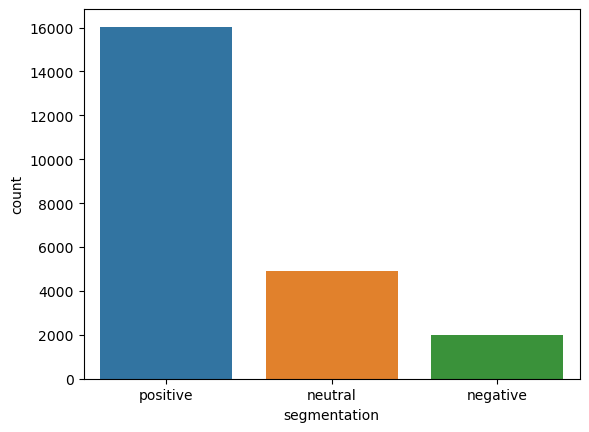

In [36]:
import seaborn as sns
df['segmentation'].value_counts()
sns.countplot(data=df, x='segmentation')
plt.show()

In [37]:
categorical_variable_summary(df,"segmentation")

In [38]:
df.head()

country        date  isVerified  position productAsin  ratingScore  \
0   India  2023-04-11        True         1  B09F6S8BT6            4   
1   India  2023-04-20        True         2  B09F6S8BT6            4   
2   India  2023-04-20        True         3  B09F6S8BT6            4   
3   India  2023-04-11        True         4  B09F6S8BT6            4   
4   India  2023-04-05        True         5  B09F6S8BT6            4   

                                   reviewDescription  \
0  tv good sound qualiti pictur qualiti also foun...   
1                                               good   
2                              v good tv fast instal   
3  much featur le price nice tv love thanku amazo...   
4  love pictur qualiti awesom sound also good del...   

                           reviewTitle              username NSentiment  \
0  Wonderful good pic & sound quality.       Amazon Customer   Positive   
1          How can I connect Bluetooth    DIPANJAN MAHAPATRA   Positive   
2                                 Good            anil bajaj   Positive   
3                               Nice..  Soheb khanSoheb khan   Positive   
4                      Value for money            AMIT MEHRA   Positive   

   tPolarity  tSubjectivity segmentation  
0   0.600000       0.533333     positive  
1   0.700000       0.600000     positive  
2   0.450000       0.600000     positive  
3   0.433333       0.600000     positive  
4   0.500000       0.560000     positive

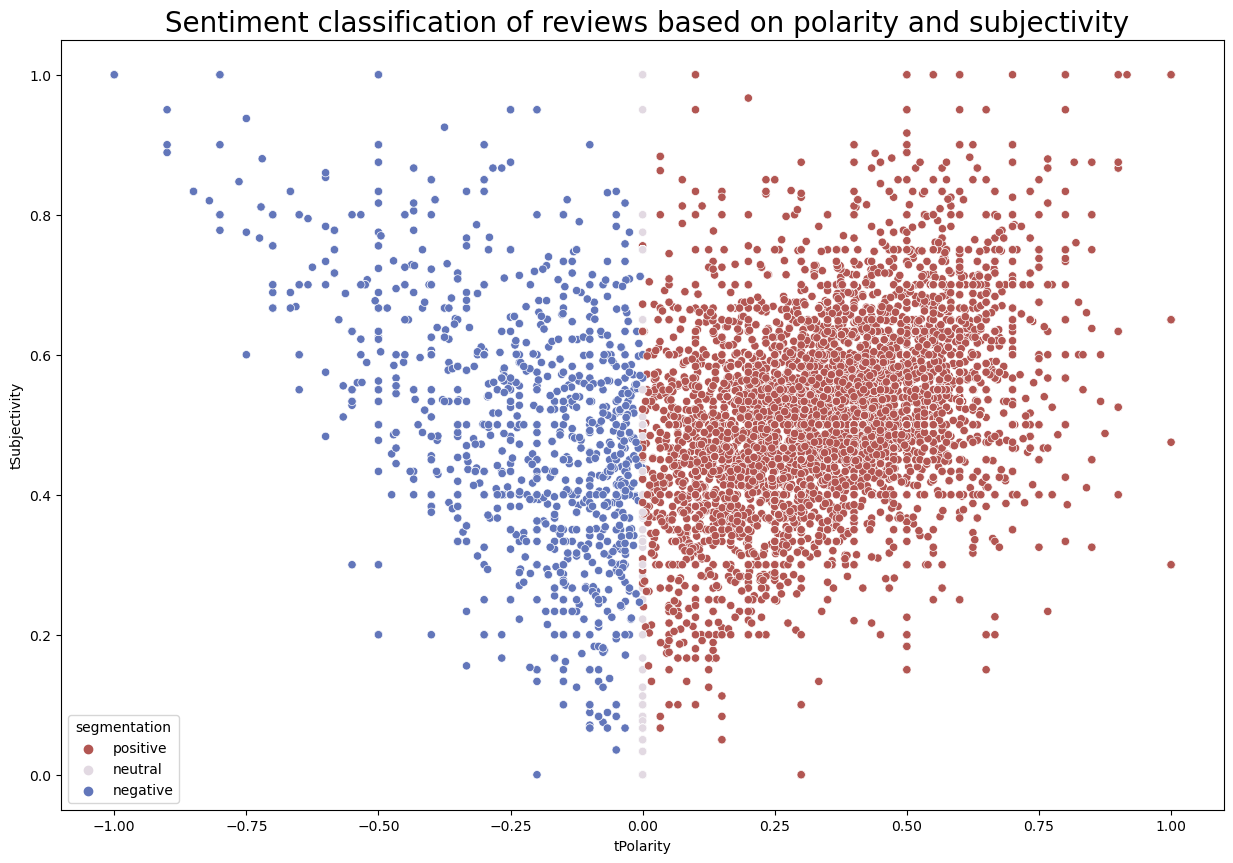

In [39]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df['tPolarity'], df['tSubjectivity'], 
                hue = df['segmentation'], edgecolor='white', palette="twilight_shifted_r")
plt.title(" Sentiment classification of reviews based on polarity and subjectivity", fontsize=20)
plt.show()

## Plotting features

As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and good were mostly used alongside a wide variety of words classified as "good sentiments".

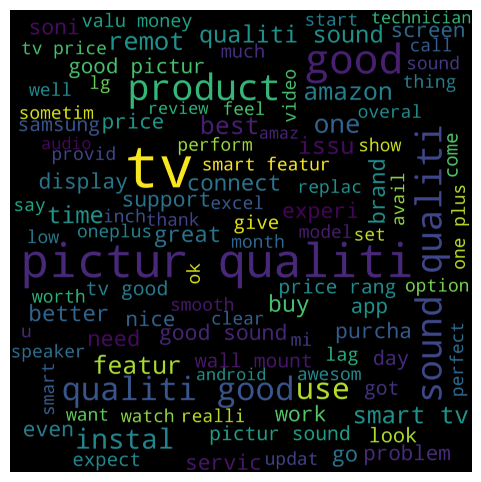

In [40]:
word_cloud_text = ''.join(df[df["segmentation"]=="positive"].reviewDescription)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for the negative reviews 

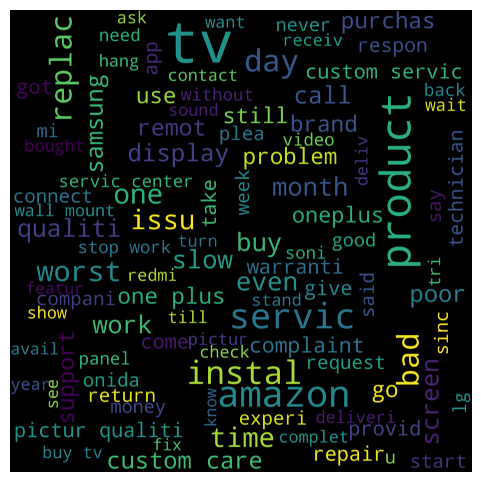

In [41]:
word_cloud_text = ''.join(df[df["segmentation"]=="negative"].reviewDescription)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 2 categories.

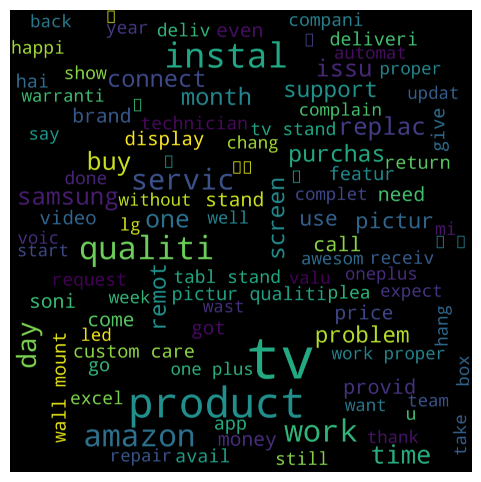

In [42]:
word_cloud_text = ''.join(df[df["segmentation"]=="neutral"].reviewDescription)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Overall

In [43]:
text = " ".join(title for title in df['reviewDescription'])

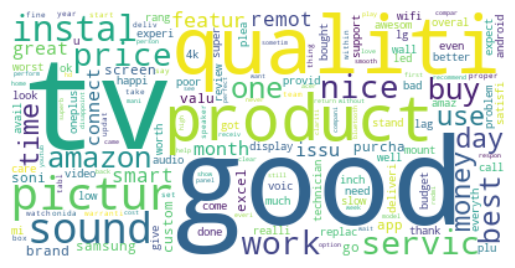

In [44]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text) # Display the generated Word Cloud 
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

In [45]:
df.head()

country        date  isVerified  position productAsin  ratingScore  \
0   India  2023-04-11        True         1  B09F6S8BT6            4   
1   India  2023-04-20        True         2  B09F6S8BT6            4   
2   India  2023-04-20        True         3  B09F6S8BT6            4   
3   India  2023-04-11        True         4  B09F6S8BT6            4   
4   India  2023-04-05        True         5  B09F6S8BT6            4   

                                   reviewDescription  \
0  tv good sound qualiti pictur qualiti also foun...   
1                                               good   
2                              v good tv fast instal   
3  much featur le price nice tv love thanku amazo...   
4  love pictur qualiti awesom sound also good del...   

                           reviewTitle              username NSentiment  \
0  Wonderful good pic & sound quality.       Amazon Customer   Positive   
1          How can I connect Bluetooth    DIPANJAN MAHAPATRA   Positive   
2                                 Good            anil bajaj   Positive   
3                               Nice..  Soheb khanSoheb khan   Positive   
4                      Value for money            AMIT MEHRA   Positive   

   tPolarity  tSubjectivity segmentation  
0   0.600000       0.533333     positive  
1   0.700000       0.600000     positive  
2   0.450000       0.600000     positive  
3   0.433333       0.600000     positive  
4   0.500000       0.560000     positive

In [ ]:
df.to_excel("cleandata.xlsx")

### plot of review sentiments

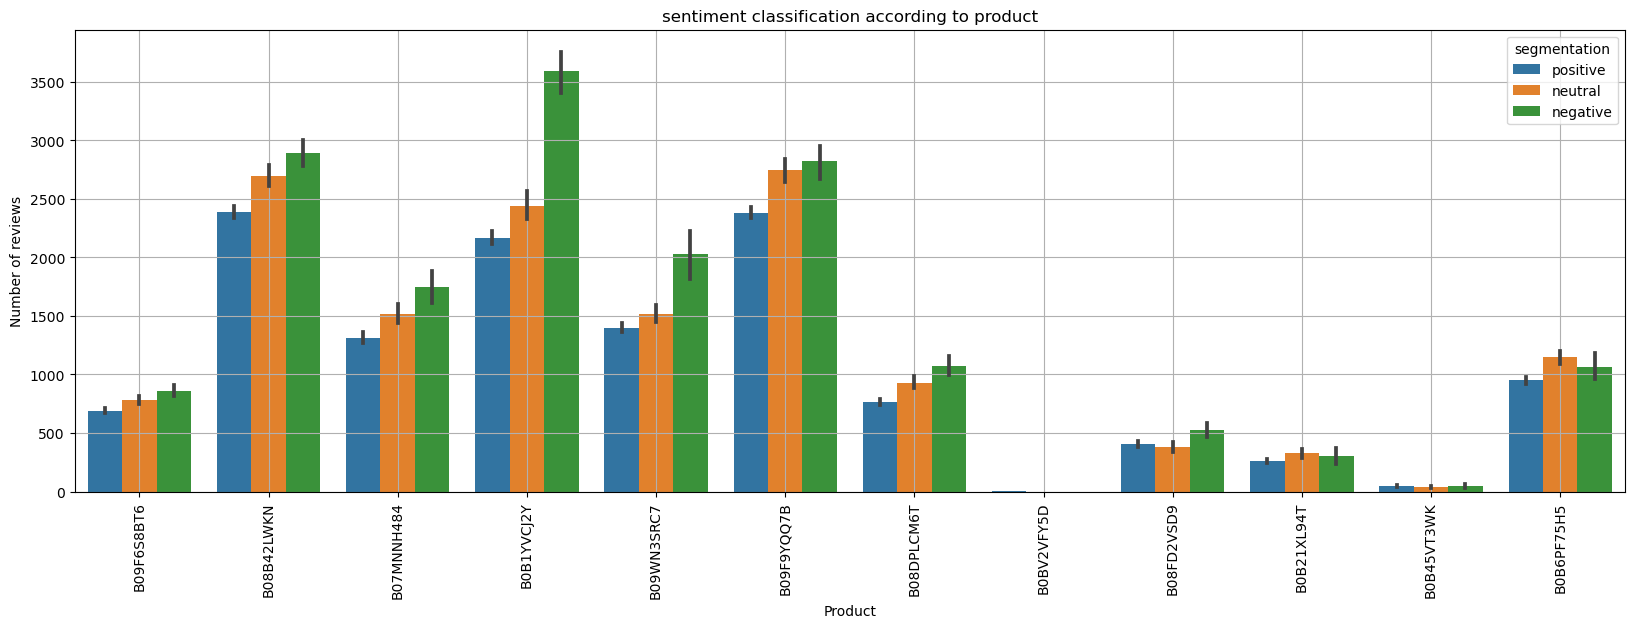

In [46]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=df,x="productAsin",y="position",hue="segmentation")
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.ylabel("Number of reviews")
plt.grid()
plt.title("sentiment classification according to product");

### plots of number sentiments

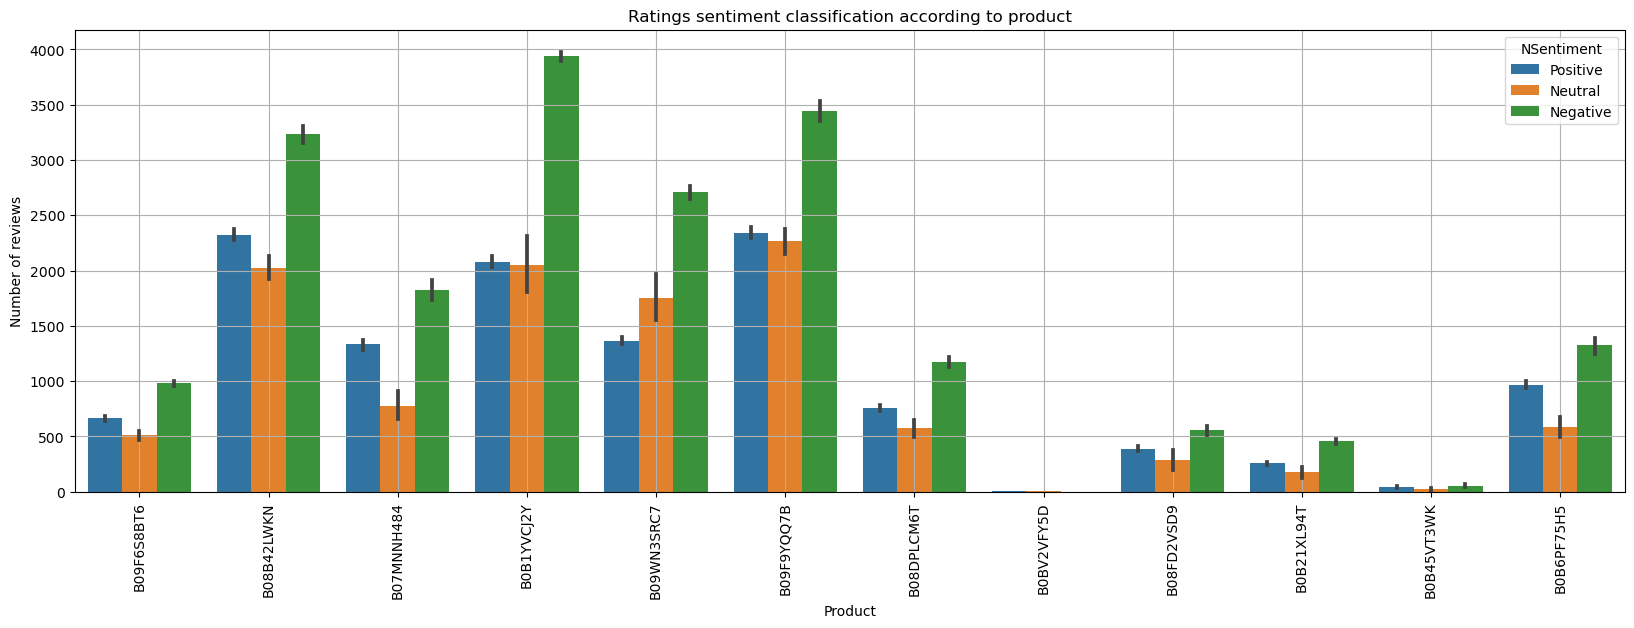

In [47]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=df,x="productAsin",y="position",hue="NSentiment")
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.ylabel("Number of reviews")
plt.grid()
plt.title("Ratings sentiment classification according to product");

In [48]:
df.head()

country        date  isVerified  position productAsin  ratingScore  \
0   India  2023-04-11        True         1  B09F6S8BT6            4   
1   India  2023-04-20        True         2  B09F6S8BT6            4   
2   India  2023-04-20        True         3  B09F6S8BT6            4   
3   India  2023-04-11        True         4  B09F6S8BT6            4   
4   India  2023-04-05        True         5  B09F6S8BT6            4   

                                   reviewDescription  \
0  tv good sound qualiti pictur qualiti also foun...   
1                                               good   
2                              v good tv fast instal   
3  much featur le price nice tv love thanku amazo...   
4  love pictur qualiti awesom sound also good del...   

                           reviewTitle              username NSentiment  \
0  Wonderful good pic & sound quality.       Amazon Customer   Positive   
1          How can I connect Bluetooth    DIPANJAN MAHAPATRA   Positive   
2                                 Good            anil bajaj   Positive   
3                               Nice..  Soheb khanSoheb khan   Positive   
4                      Value for money            AMIT MEHRA   Positive   

   tPolarity  tSubjectivity segmentation  
0   0.600000       0.533333     positive  
1   0.700000       0.600000     positive  
2   0.450000       0.600000     positive  
3   0.433333       0.600000     positive  
4   0.500000       0.560000     positive

In [49]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train, y_test = train_test_split(
    df[['reviewDescription']],
    df[['segmentation']],
    test_size=0.2,
    random_state=42
)

# Feature extraction

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

X_train_vect= vectorizer.fit_transform(X_train['reviewDescription'])
X_test_vect= vectorizer.transform(X_test['reviewDescription'])

y_train=y_train['segmentation'].map({"positive":0,"negative":1,"neutral":2})
y_test=y_test['segmentation'].map({"positive":0,"negative":1,"neutral":2})

In [65]:
model_NB = MultinomialNB()
model_NB.fit(X_train_vect,y_train)
y_predict= model_NB.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3235
           1       0.95      0.09      0.16       401
           2       0.90      0.18      0.31       952

    accuracy                           0.75      4588
   macro avg       0.86      0.42      0.44      4588
weighted avg       0.79      0.75      0.68      4588

[[3222    1   12]
 [ 357   36    8]
 [ 776    1  175]]


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_vect,y_train)
y_predict= model_RF.predict(X_test_vect)

print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3235
           1       0.95      0.70      0.80       401
           2       0.91      0.95      0.93       952

    accuracy                           0.95      4588
   macro avg       0.94      0.88      0.90      4588
weighted avg       0.95      0.95      0.95      4588

[[3183    9   43]
 [  79  280   42]
 [  44    6  902]]


In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train_vect,y_train)
y_predict= model_extra.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3235
           1       0.97      0.63      0.76       401
           2       0.93      0.91      0.92       952

    accuracy                           0.94      4588
   macro avg       0.95      0.84      0.88      4588
weighted avg       0.94      0.94      0.94      4588

[[3199    5   31]
 [ 120  252   29]
 [  86    4  862]]


In [56]:
from sklearn.linear_model import LogisticRegression

In [73]:
model_LR=LogisticRegression()
model_LR.fit(X_train_vect,y_train)
y_predict= model_LR.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3235
           1       0.93      0.76      0.84       401
           2       0.91      0.97      0.94       952

    accuracy                           0.96      4588
   macro avg       0.94      0.90      0.92      4588
weighted avg       0.96      0.96      0.96      4588

[[3181   14   40]
 [  42  304   55]
 [  24    8  920]]


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_vect,y_train)
y_predict= model_DT.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3235
           1       0.90      0.89      0.90       401
           2       0.98      0.99      0.98       952

    accuracy                           0.98      4588
   macro avg       0.96      0.96      0.96      4588
weighted avg       0.98      0.98      0.98      4588

[[3187   37   11]
 [  33  358   10]
 [   8    1  943]]


In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model_KN = KNeighborsClassifier(n_neighbors=10)
model_KN.fit(X_train_vect,y_train)
y_predict= model_KN.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.56      0.71      3235
           1       0.92      0.13      0.23       401
           2       0.33      0.91      0.49       952

    accuracy                           0.60      4588
   macro avg       0.73      0.54      0.48      4588
weighted avg       0.82      0.60      0.62      4588

[[1812    4 1419]
 [  11   54  336]
 [  80    1  871]]


In [62]:
from sklearn import svm

In [63]:
model = svm.LinearSVC(random_state=100)
model.fit(X_train_vect,y_train)
y_predict= model.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3235
           1       0.94      0.87      0.90       401
           2       0.95      0.98      0.96       952

    accuracy                           0.98      4588
   macro avg       0.96      0.95      0.95      4588
weighted avg       0.98      0.98      0.98      4588

[[3196   14   25]
 [  25  350   26]
 [  11   10  931]]


In [71]:
from sklearn.ensemble import VotingClassifier

In [74]:
ensemble_model = VotingClassifier(estimators=[('nb', model_NB), ('rf',model_RF),('et',model_extra),('lr', model_LR), ('dt',model_DT),('kn',model_KN)], voting='soft')

In [75]:
ensemble_model.fit(X_train_vect, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('et', ExtraTreesClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('kn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [76]:
y_pred = ensemble_model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

Accuracy: 0.9673060156931125
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3235
           1       0.98      0.75      0.85       401
           2       0.94      0.98      0.96       952

    accuracy                           0.97      4588
   macro avg       0.97      0.91      0.93      4588
weighted avg       0.97      0.97      0.97      4588

[[3205    5   25]
 [  61  302   38]
 [  21    0  931]]


NameError: name 'metrics' is not defined